# SETTING it up 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import  r2_score
from sklearn.model_selection import  train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import GridSearchCV
from scipy.stats import skew
from sklearn.pipeline import Pipeline



%matplotlib inline

from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso, ElasticNetCV
from sklearn.model_selection import cross_val_score



from sklearn.preprocessing import PolynomialFeatures








In [2]:
train = pd.read_csv('./datasets/ames_training.csv')

test = pd.read_csv('./datasets/ames_test.csv')

In [3]:
train_ID = train['Id']
test_ID = test['Id']

In [4]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
All = pd.concat((train, test)).reset_index(drop=True)
All.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(All.shape))

All.columns = [x.replace(' ', '') for x in All.columns]

all_data size is : (2919, 80)


/Users/richardmason/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


# First Impressions 

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Doing some feature engineering





In [9]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [10]:
All["PoolQC"] = All["PoolQC"].fillna("None")

All["MiscFeature"] = All["MiscFeature"].fillna("None")

All["Alley"] = All["Alley"].fillna("None")

All["Fence"] = All["Fence"].fillna("None")

All["FireplaceQu"] = All["FireplaceQu"].fillna("None")



All["LotFrontage"] = All.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

All['GarageYrBlt'] = All['GarageYrBlt'].fillna(All['GarageYrBlt'].mode()[0])

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    All[col] = All[col].fillna('None')

for col in ('GarageArea', 'GarageCars'):
    All[col] = All[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    All[col] = All[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    All[col] = All[col].fillna('None')

All["MasVnrType"] = All["MasVnrType"].fillna("None")
All["MasVnrArea"] = All["MasVnrArea"].fillna(0)

All['MSZoning'] = All['MSZoning'].fillna(All['MSZoning'].mode()[0])

All = All.drop(['Utilities'], axis=1)

All["Functional"] = All["Functional"].fillna("Typ")

All['Electrical'] = All['Electrical'].fillna(All['Electrical'].mode()[0])

All['KitchenQual'] = All['KitchenQual'].fillna(All['KitchenQual'].mode()[0])

All['Exterior1st'] = All['Exterior1st'].fillna(All['Exterior1st'].mode()[0])
All['Exterior2nd'] = All['Exterior2nd'].fillna(All['Exterior2nd'].mode()[0])

All['SaleType'] = All['SaleType'].fillna(All['SaleType'].mode()[0])

All['MSSubClass'] = All['MSSubClass'].fillna("None")

#Check remaining missing values if any 
All_na = (All.isnull().sum() / len(All)) * 100
All_na = All_na.drop(All_na[All_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :All_na})
missing_data.head()

All['LotFrontage'] = All['LotFrontage'].fillna(All['LotFrontage'].median())

#MSSubClass=The building class
All['MSSubClass'] = All['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
All['OverallCond'] = All['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
All['YrSold'] = All['YrSold'].astype(str)
All['MoSold'] = All['MoSold'].astype(str)

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(All[c].values)) 
    All[c] = lbl.transform(list(All[c].values))

# shape        
print('Shape All: {}'.format(All.shape))

All['TotalSF'] = All['TotalBsmtSF'] + All['1stFlrSF'] + All['2ndFlrSF']
All.drop(columns = 'Id', axis = 1)

Shape All: (2919, 79)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,856,854,0,1,3,1Fam,4,3,706.0,0.0,...,WD,0,1,8,856.0,0,2003,2003,2,2566.0
1,1262,0,0,1,3,1Fam,4,1,978.0,0.0,...,WD,0,1,6,1262.0,298,1976,1976,1,2524.0
2,920,866,0,1,3,1Fam,4,2,486.0,0.0,...,WD,0,1,6,920.0,0,2001,2002,2,2706.0
3,961,756,0,1,3,1Fam,1,3,216.0,0.0,...,WD,0,1,7,756.0,0,1915,1970,0,2473.0
4,1145,1053,0,1,4,1Fam,4,0,655.0,0.0,...,WD,0,1,9,1145.0,192,2000,2000,2,3343.0
5,796,566,320,1,1,1Fam,4,3,732.0,0.0,...,WD,0,1,5,796.0,40,1993,1995,3,2158.0
6,1694,0,0,1,3,1Fam,4,0,1369.0,0.0,...,WD,0,1,7,1686.0,255,2004,2005,1,3380.0
7,1107,983,0,1,3,1Fam,4,2,859.0,32.0,...,WD,0,1,7,1107.0,235,1973,1973,3,3197.0
8,1022,752,0,1,2,1Fam,4,3,0.0,0.0,...,WD,0,1,8,952.0,90,1931,1950,2,2726.0
9,1077,0,0,1,2,2fmCon,4,3,851.0,0.0,...,WD,0,1,5,991.0,0,1939,1950,2,2068.0


In [11]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null int64
BsmtExposure     2919 non-null int64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null int64
BsmtFinType2     2919 non-null int64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null int64
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null int64
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null int64
ExterQual        2919 non-null int64
Exterior1st      2919 non-nu

In [12]:
numeric_feats = All.select_dtypes(exclude = 'object')

# Transform skewed numerical features, to eliminate the effect of outliers

In [13]:
# Check the skew of all numerical features
skewed_feats = numeric_feats
skewed_feats = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [14]:
skewness = skewness[abs(skewness.Skew) > 0.5]

In [15]:
skewness

,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [16]:
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 46 skewed numerical features to Box Cox transform


In [17]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    print(feat)
    All[feat] += 1
    print(All[feat])
    All[feat] = boxcox1p(All[feat], lam)
    
#All[skewed_features] = np.log1p(All[skewed_features])

MiscVal
0         1
1         1
2         1
3         1
4         1
5       701
6         1
7       351
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16      701
17      501
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
       ... 
2889      1
2890      1
2891      1
2892      1
2893      1
2894      1
2895      1
2896      1
2897      1
2898      1
2899      1
2900      1
2901      1
2902      1
2903      1
2904      1
2905      1
2906      1
2907      1
2908      1
2909      1
2910      1
2911      1
2912      1
2913      1
2914      1
2915      1
2916      1
2917    701
2918      1
Name: MiscVal, Length: 2919, dtype: int64
PoolArea
0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1

TotalBsmtSF
0        857.0
1       1263.0
2        921.0
3        757.0
4       1146.0
5        797.0
6       1687.0
7       1108.0
8        953.0
9        992.0
10      1041.0
11      1176.0
12       913.0
13      1495.0
14      1254.0
15       833.0
16      1005.0
17         1.0
18      1115.0
19      1030.0
20      1159.0
21       638.0
22      1778.0
23      1041.0
24      1061.0
25      1567.0
26       901.0
27      1705.0
28      1485.0
29       521.0
         ...  
2889     642.0
2890     968.0
2891       1.0
2892     661.0
2893     217.0
2894    1574.0
2895    1595.0
2896    1626.0
2897    1665.0
2898    1492.0
2899    1129.0
2900    1633.0
2901    1382.0
2902    1729.0
2903    1839.0
2904       1.0
2905    1289.0
2906     265.0
2907     865.0
2908    1653.0
2909     631.0
2910     547.0
2911    1105.0
2912     547.0
2913     547.0
2914     547.0
2915     547.0
2916    1225.0
2917     913.0
2918     997.0
Name: TotalBsmtSF, Length: 2919, dtype: float64
BsmtUnfSF
0        151.0


PoolQC
0       4
1       4
2       4
3       4
4       4
5       4
6       4
7       4
8       4
9       4
10      4
11      4
12      4
13      4
14      4
15      4
16      4
17      4
18      4
19      4
20      4
21      4
22      4
23      4
24      4
25      4
26      4
27      4
28      4
29      4
       ..
2889    4
2890    4
2891    4
2892    4
2893    4
2894    4
2895    4
2896    4
2897    4
2898    4
2899    4
2900    4
2901    4
2902    4
2903    4
2904    4
2905    4
2906    4
2907    4
2908    4
2909    4
2910    4
2911    4
2912    4
2913    4
2914    4
2915    4
2916    4
2917    4
2918    4
Name: PoolQC, Length: 2919, dtype: int64


In [18]:
skewness

,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [19]:
All.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,11.695834,11.689408,0.730463,1.194318,3,1Fam,2.055642,1.820334,11.174109,0.730463,...,WD,0.730463,1.194318,2.750250,11.695834,0.730463,14.189087,2003,2,14.977855
1,12.794586,0.730463,0.730463,1.194318,3,1Fam,2.055642,1.194318,12.065700,0.730463,...,WD,0.730463,1.194318,2.440268,12.794586,9.018059,14.146717,1976,1,14.924382
2,11.895060,11.727779,0.730463,1.194318,3,1Fam,2.055642,1.540963,10.205533,0.730463,...,WD,0.730463,1.194318,2.440268,11.895060,0.730463,14.185966,2002,2,15.150886
3,12.016594,11.357663,0.730463,1.194318,3,1Fam,1.194318,1.820334,8.284573,0.730463,...,WD,0.730463,1.194318,2.602594,11.357663,0.730463,14.049150,1970,0,14.858426
4,12.513097,12.274059,0.730463,1.194318,4,1Fam,2.055642,0.730463,10.975160,0.730463,...,WD,0.730463,1.194318,2.885846,12.513097,8.025268,14.184404,2000,2,15.853322


## Transform categorical variables with pd.get_dummies, and seperate back out train from test

In [20]:
All = pd.get_dummies(All)
print(All.shape)

train = All[:ntrain]
test = All[ntrain:]

train.shape

test.shape

(2919, 222)


(1459, 222)

## Drop saleprice from train

In [21]:
y = pd.DataFrame(data = y_train)

In [22]:
y

,0
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


In [23]:
train['SalePrice'] = y

/Users/richardmason/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
0    1460 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB


In [25]:
y.shape

(1460, 1)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 223 entries, 1stFlrSF to SalePrice
dtypes: float64(49), int64(12), uint8(162)
memory usage: 926.8 KB


In [27]:
test.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Columns: 222 entries, 1stFlrSF to SaleType_WD
dtypes: float64(49), int64(11), uint8(162)
memory usage: 914.8 KB


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 223 entries, 1stFlrSF to SalePrice
dtypes: float64(49), int64(12), uint8(162)
memory usage: 926.8 KB


In [29]:
top_20 = train.corr().sort_values('SalePrice', ascending = False).index[1:20]

In [30]:
train

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,11.695834,11.689408,0.730463,1.194318,3,2.055642,1.820334,11.174109,0.730463,2,...,0,0,0,0,0,0,0,0,1,208500
1,12.794586,0.730463,0.730463,1.194318,3,2.055642,1.194318,12.065700,0.730463,0,...,0,0,0,0,0,0,0,0,1,181500
2,11.895060,11.727779,0.730463,1.194318,3,2.055642,1.540963,10.205533,0.730463,2,...,0,0,0,0,0,0,0,0,1,223500
3,12.016594,11.357663,0.730463,1.194318,3,1.194318,1.820334,8.284573,0.730463,0,...,0,0,0,0,0,0,0,0,1,140000
4,12.513097,12.274059,0.730463,1.194318,4,2.055642,0.730463,10.975160,0.730463,2,...,0,0,0,0,0,0,0,0,1,250000
5,11.497236,10.594136,9.185445,1.194318,1,2.055642,1.820334,11.270884,0.730463,2,...,0,0,0,0,0,0,0,0,1,143000
6,13.672007,0.730463,0.730463,1.194318,3,2.055642,0.730463,13.033249,0.730463,2,...,0,0,0,0,0,0,0,0,1,307000
7,12.416413,12.080005,0.730463,1.194318,3,2.055642,1.540963,11.705451,4.647709,0,...,0,0,0,0,0,0,0,0,1,200000
8,12.189514,11.343364,0.730463,1.194318,2,2.055642,1.820334,0.730463,0.730463,6,...,0,0,0,0,0,0,0,0,1,129900
9,12.338074,0.730463,0.730463,1.194318,2,2.055642,1.820334,11.679743,0.730463,2,...,0,0,0,0,0,0,0,0,1,118000


In [31]:
train.drop(columns='SalePrice', inplace=True)

/Users/richardmason/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.695834,11.689408,0.730463,1.194318,3,2.055642,1.820334,11.174109,0.730463,2,...,0,0,0,0,0,0,0,0,0,1
1,12.794586,0.730463,0.730463,1.194318,3,2.055642,1.194318,12.065700,0.730463,0,...,0,0,0,0,0,0,0,0,0,1
2,11.895060,11.727779,0.730463,1.194318,3,2.055642,1.540963,10.205533,0.730463,2,...,0,0,0,0,0,0,0,0,0,1
3,12.016594,11.357663,0.730463,1.194318,3,1.194318,1.820334,8.284573,0.730463,0,...,0,0,0,0,0,0,0,0,0,1
4,12.513097,12.274059,0.730463,1.194318,4,2.055642,0.730463,10.975160,0.730463,2,...,0,0,0,0,0,0,0,0,0,1


In [33]:
train = train[top_20]

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
OverallQual             1460 non-null int64
TotalSF                 1460 non-null float64
GrLivArea               1460 non-null float64
GarageCars              1460 non-null float64
GarageArea              1460 non-null float64
1stFlrSF                1460 non-null float64
FullBath                1460 non-null int64
TotRmsAbvGrd            1460 non-null float64
YearBuilt               1460 non-null float64
YearRemodAdd            1460 non-null int64
Foundation_PConc        1460 non-null uint8
Fireplaces              1460 non-null float64
OpenPorchSF             1460 non-null float64
MasVnrArea              1460 non-null float64
TotalBsmtSF             1460 non-null float64
Neighborhood_NridgHt    1460 non-null uint8
GarageYrBlt             1460 non-null float64
LotArea                 1460 non-null float64
SaleType_New            1460 non-null uint8
dtypes: float64(13), int64(3), 

In [35]:
y

,0
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


In [36]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(train, np.log(y), random_state = 0)

In [37]:
#Standardizing the values
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [38]:
X_train

array([[-0.78628805,  1.03409947,  1.53196876, ...,  0.22202355,
        -0.64301613, -0.2992528 ],
       [ 0.68171777, -0.9208716 ,  0.04156489, ...,  0.46293102,
         0.29342211, -0.2992528 ],
       [-1.52029096, -1.36624449, -1.20540361, ..., -0.58100135,
         0.19256247, -0.2992528 ],
       ...,
       [-0.05228514, -0.84388327,  0.82879641, ..., -0.05903516,
        -0.07456324, -0.2992528 ],
       [ 0.68171777,  0.56389064,  0.2114106 , ...,  0.94474597,
        -1.9056299 , -0.2992528 ],
       [ 0.68171777,  0.68033295,  0.72358169, ...,  0.74398974,
         1.19655076, -0.2992528 ]])

In [40]:
# Model #1: Linear regression including all features
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Linear regression R^2 on the training set is: {}".format(lr.score(X_train, y_train)))
print("Linear regression R^2 on the test set is: {}".format(lr.score(X_test, y_test)))

pd.DataFrame({"Feature":train.columns, 
              "Coefficient": lr.coef_[0]})

# Since the performance is so much worst on the test set, it's safe to say our model suffers from high variance

Linear regression R^2 on the training set is: 0.8686979763926685
Linear regression R^2 on the test set is: 0.8173144230915639


,Feature,Coefficient
0,OverallQual,0.111982
1,TotalSF,0.087401
2,GrLivArea,0.068603
3,GarageCars,0.012123
4,GarageArea,0.031213
5,1stFlrSF,0.009136
6,FullBath,-0.005092
7,TotRmsAbvGrd,-0.013275
8,YearBuilt,0.067647
9,YearRemodAdd,0.056960


In [41]:
# Model 2, Ridge regression(ridge regularization)
alphas = np.linspace(0.001, 1000, 30)

alphas

array([1.00000000e-03, 3.44837241e+01, 6.89664483e+01, 1.03449172e+02,
       1.37931897e+02, 1.72414621e+02, 2.06897345e+02, 2.41380069e+02,
       2.75862793e+02, 3.10345517e+02, 3.44828241e+02, 3.79310966e+02,
       4.13793690e+02, 4.48276414e+02, 4.82759138e+02, 5.17241862e+02,
       5.51724586e+02, 5.86207310e+02, 6.20690034e+02, 6.55172759e+02,
       6.89655483e+02, 7.24138207e+02, 7.58620931e+02, 7.93103655e+02,
       8.27586379e+02, 8.62069103e+02, 8.96551828e+02, 9.31034552e+02,
       9.65517276e+02, 1.00000000e+03])

In [42]:
cross_val_scores = []
test_scores = []
train_scores = []

best_score = 0
for alpha in alphas:

    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    train_scores.append(ridge.score(X_train, y_train))
    cross_val_scores.append(cross_val_score(ridge, X_train, y_train, cv = 5).mean())
    test_scores.append(ridge.score(X_test, y_test))
    if cross_val_score(ridge, X_train, y_train, cv = 10).mean() > best_score:

        best_alpha = alpha
        best_score = cross_val_score(ridge, X_train, y_train, cv = 10).mean()

    

In [46]:
    
    

ridge = Ridge(alpha = best_alpha)
ridge.fit(X_train, y_train)
y_preds = ridge.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_preds, y_test))
print('train score: ', ridge.score(X_train, y_train))
print('cross_val_score: ', cross_val_score(ridge, X_train, y_train, cv = 10).mean())
print('test score: ', ridge.score(X_test, y_test))
print('RMSE: ', RMSE)
print('Best alpha: ', best_alpha)

train score:  0.8682875433034793
cross_val_score:  0.8602178476579343
test score:  0.8199967487838219
RMSE:  0.1636154907250206
Best alpha:  34.483724137931034


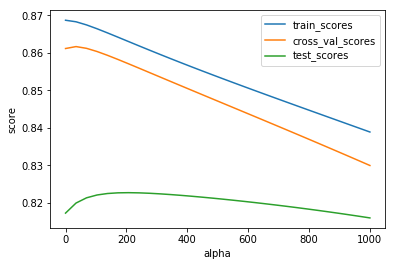

In [47]:
plt.plot(alphas, train_scores, label = 'train_scores')
plt.plot(alphas, cross_val_scores, label = 'cross_val_scores')
plt.plot(alphas, test_scores, label = 'test_scores')
plt.xlabel('alpha')
plt.ylabel('score')
plt.legend(loc = 'upper right');

In [48]:
pd.DataFrame({"Feature":train.columns, 
              "Coefficient": ridge.coef_[0]}).sort_values('Coefficient', ascending =False)

,Feature,Coefficient
0,OverallQual,0.106665
2,GrLivArea,0.070059
1,TotalSF,0.067706
8,YearBuilt,0.062425
9,YearRemodAdd,0.054933
17,LotArea,0.051651
11,Fireplaces,0.035784
4,GarageArea,0.029622
3,GarageCars,0.016828
5,1stFlrSF,0.016127


In [ ]:
# Submitting to kaggle


ss = StandardScaler()
test = ss.fit_transform(test)

# Submitting to kaggle
preds = ridge.predict(test)

In [ ]:
preds = np.exp(preds)

In [ ]:
preds = preds.flatten()

In [ ]:
kaggle = pd.DataFrame({'Id':test_ID,
                      'SalePrice': preds})

In [ ]:
kaggle_ames = kaggle.to_csv('./kaggle_submission.csv', index = False)

In [ ]:
# adding in polynomial features 
